In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from ipywidgets import interact
%matplotlib inline

In [3]:
plt.style.use("ggplot")
np.random.seed(123)#シード値：乱数を生成する種のこと。これが同じだと同じ乱数が発生

In [4]:
#モンテカルロ法でπの近似値を導く
NMC = 100
xmc=np.random.rand(NMC)#引数の数だけ０～１の乱数を生成する.それをarrayで出力
ymc=np.random.rand(NMC)
r=(xmc**2+ymc**2)**0.5
accept= np.where(r<1,1,0)#np.where:判別式(条件式、TRUE値、FALSE値)
accept_ratio=np.sum(accept)/NMC
print(accept_ratio)

0.82


In [5]:
#モンテカルロ法において実際に円に点がプロットされている様子を視覚的に表現する
NMC = 2000
xmc=np.random.rand(NMC)#引数の数だけ０～１の乱数を生成する.それをarrayで出力
ymc=np.random.rand(NMC)
@interact(mcs=(0,NMC,1))#モンテカルロステップを踏むにつれてごう変化するか、その横軸の設定０～NMCまでを1刻み
def animation(mcs=0):
    plt.figure(figsize=(6,6))#表示する図の大きさ
    plt.xlim([0,1])
    plt.ylim([0,1])
    x=np.arange(0,1,0.001)#連番、等差数列を作成する、０～１を0.001刻みで
    y=(1-x**2)**0.5
    y2=np.ones(x.shape[0])#x.shapeが（作られた数、１）なので結局作られたｘの数だけ１を作る、arrayで出力
    plt.plot(x,y)
    plt.fill_between(x,y,alpha=0.3)#領域に色を塗る
    plt.fill_between(x,y,y2,alpha=0.3)#領域に色を塗る
    r=(xmc[:mcs]**2+ymc[:mcs]**2)**0.5
    accept= np.where(r<1,1,0)#np.where:判別式(条件式、TRUE値、FALSE値)
    accept_ratio=np.sum(accept)/mcs
    plt.scatter(xmc[:mcs],ymc[:mcs],color="black",marker=".")
    plt.show
    print("Monte Carlo:",accept_ratio)
    print("Analytical Solution:",np.pi/4.0)

interactive(children=(IntSlider(value=0, description='mcs', max=2000), Output()), _dom_classes=('widget-intera…

In [6]:
pi_mcs=[]
NMC = 2000
xmc=np.random.rand(NMC)
ymc=np.random.rand(NMC)
for mcs in range(1,NMC):
    r=(xmc[:mcs]**2+ymc[:mcs]**2)**0.5
    accept=np.where(r<1,1,0)
    accept_ratio=np.sum(accept)/mcs
    pi_mcs.append(accept_ratio)

In [7]:
pi_x=np.arange(len(pi_mcs))+1

Text(0,0.5,'accept_ratio')

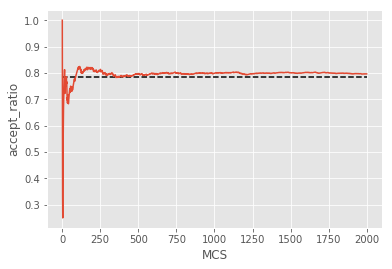

In [8]:
plt.plot(pi_x,pi_mcs)
plt.hlines(0.785,pi_x[0],pi_x[-1],linestyle="dashed")
plt.xlabel("MCS")
plt.ylabel("accept_ratio")